In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块

# 读取Excel文件
df = pd.read_excel('客户信息.xlsx')

# 显示数据格式和统计信息
print(df.info())  # 显示数据格式
print(df.describe())  # 显示数据的统计信息


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   年龄(岁)   112 non-null    int64
 1   收入(万元)  112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None
            年龄(岁)      收入(万元)
count  112.000000  112.000000
mean    37.187500   43.625000
std      8.048872   16.220955
min     21.000000   15.000000
25%     30.000000   27.750000
50%     37.500000   48.500000
75%     44.000000   54.250000
max     52.000000   74.000000


C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wzj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK

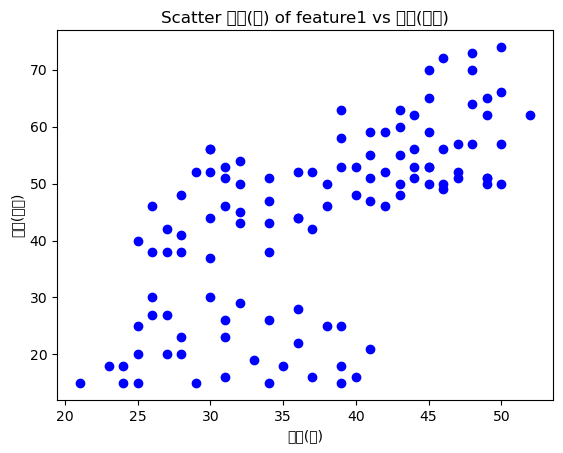

In [3]:
import matplotlib.pyplot as plt

# 假设有两个特征：feature1 和 feature2
plt.scatter(df['年龄(岁)'], df['收入(万元)'], c='blue', marker='o')
plt.title('Scatter 年龄(岁) of feature1 vs 收入(万元)')
plt.xlabel('年龄(岁)')
plt.ylabel('收入(万元)')
plt.show()


c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

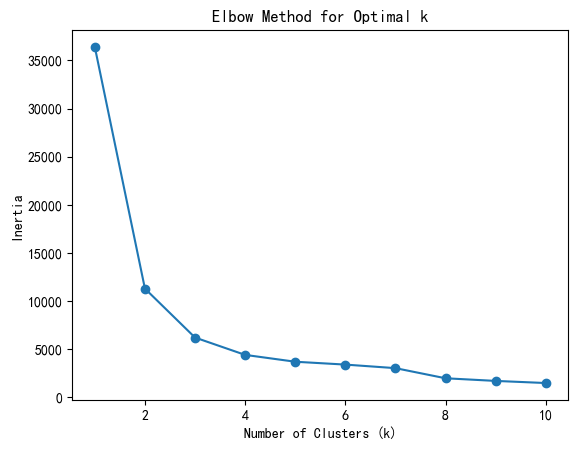

c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
from sklearn.cluster import KMeans
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# 假设我们要聚类的数据是 df 中的某些特征
X = df[['年龄(岁)', '收入(万元)']]  # 根据实际特征选择

# 寻找最优k值
inertia = []  # 存储不同k值的聚类结果
k_range = range(1, 11)  # 假设我们实验k从1到10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # 记录聚类的总误差（即“惯性”）

# 绘制k值与惯性值的折线图
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 选择最佳k值进行聚类（可以基于惯性曲线的“肘部”选择）
optimal_k = 3  # 假设最佳k值为3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)  # 聚类标签添加到数据中


In [ ]:

kmeans1 = KMeans(n_clusters=3, random_state=42)
df['cluster1'] = kmeans1.fit_predict(X)

kmeans2 = KMeans(n_clusters=4, random_state=42)
df['cluster2'] = kmeans2.fit_predict(X)

# 交叉分析
from sklearn.metrics import adjusted_rand_score

# 比较两个聚类结果的相似性
ari = adjusted_rand_score(df['cluster1'], df['cluster2'])
print(f'Adjusted Rand Index (ARI) between two clustering results: {ari}')


Adjusted Rand Index (ARI) between two clustering results: 0.7186779795873574


c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


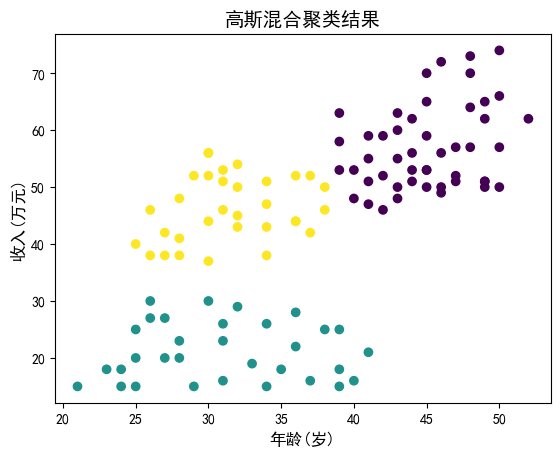

c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


新数据点的聚类预测结果: [1 1 1]


KeyError: '真实标签'

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score  # 用于计算ARI
import matplotlib.pyplot as plt
import numpy as np

# 假设你已经加载了数据
X = df[['年龄(岁)', '收入(万元)']]  # 替换为你的特征列

# 使用 GMM 聚类
gmm = GaussianMixture(n_components=3, random_state=42)  # 设定聚类数为3（可以根据实际需求调整）
gmm.fit(X)

# 获取聚类标签
df['gmm_cluster'] = gmm.predict(X)

# 可视化聚类结果
plt.scatter(df['年龄(岁)'], df['收入(万元)'], c=df['gmm_cluster'], cmap='viridis', marker='o')
plt.title('高斯混合聚类结果', fontsize=14)  # 中文标题
plt.xlabel('年龄(岁)', fontsize=12)  # 中文X轴标签
plt.ylabel('收入(万元)', fontsize=12)  # 中文Y轴标签
plt.show()

# 预测新数据点
new_data = np.array([[30, 10], [45, 20], [60, 15]])  # 假设有新的数据点
new_predictions = gmm.predict(new_data)

print(f'新数据点的聚类预测结果: {new_predictions}')

# 计算准确率（如果有真实标签）
# 假设你有真实的标签（真实标签列为true_labels）
true_labels = df['真实标签']  # 替换为实际的真实标签列
ari = adjusted_rand_score(true_labels, df['gmm_cluster'])
print(f'聚类结果的调整兰德指数 (ARI): {ari}')


c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


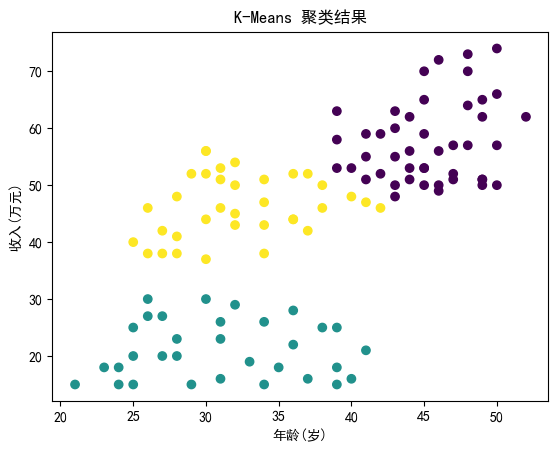

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# 可视化K-Means聚类结果
plt.scatter(df['年龄(岁)'], df['收入(万元)'], c=df['kmeans_cluster'], cmap='viridis', marker='o')
plt.title('K-Means 聚类结果')
plt.xlabel('年龄(岁)')
plt.ylabel('收入(万元)')
plt.show()
